<a href="https://colab.research.google.com/github/dcovarru/Python/blob/master/Application_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid Data Example

In this notebook we will download publicly available Covid-19 data and perform Exploratory Data Analysis using Python and Jupyter.

This Section is created using Markdown
More to come!

Import packages
In this Section we will import the necessary Pythgon "packages" to execute our Notebook
Packages are add-on's to basic Python.  We will be creating a simple package in (Add Section/notebook)


# Import Packages



In this section we will import the packages.

Tip: I almost always import pandas and numpy. 

In [71]:
#####################
# Import packages
#####################

import pandas as pd
import numpy as np
import dateutil
import datetime
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
plt.style.use('seaborn-whitegrid')
import io
import ipywidgets

import seaborn as sns
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 1
# test ipad comment

###### why add these? ######

pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column', 50)


# Accessing Data

In [72]:
#####################
# Import NYT data 
#####################

covidData = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

# https://github.com/nytimes/covid-19-data
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

#####################
# helper sites #
#####################

# https://medium.com/@deallen7/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab#83e5
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# Inspecting Data

In [73]:
covidData['date'].max()

'2020-11-13'

In [74]:
# ensure Date is data
# covidData.dtypes
# covidData['date'] = covidData['date'].apply(dateutil.parser.parse, dayfirst=True)
covidData['date_dtFormat'] = pd.to_datetime(covidData['date'])
# covidData

In [75]:
covidData.dtypes

date                     object
county                   object
state                    object
fips                    float64
cases                     int64
deaths                    int64
date_dtFormat    datetime64[ns]
dtype: object

# ETL of Data

In [76]:
#####################
# ETL data 
#####################
covidData[['date_dtFormat']]
covidData.loc[:,['date_dtFormat']]

,date_dtFormat
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-24
...,...
729020,2020-11-13
729021,2020-11-13
729022,2020-11-13
729023,2020-11-13


In [77]:
covidData

,date,county,state,fips,cases,deaths,date_dtFormat
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24
...,...,...,...,...,...,...,...
729020,2020-11-13,Sweetwater,Wyoming,56037.0,991,4,2020-11-13
729021,2020-11-13,Teton,Wyoming,56039.0,1108,2,2020-11-13
729022,2020-11-13,Uinta,Wyoming,56041.0,686,4,2020-11-13
729023,2020-11-13,Washakie,Wyoming,56043.0,205,7,2020-11-13


In [78]:
#####################
# Aggregate by Week
#####################

# covidData.tail(30)
# df['date_time'].dt.strftime('%Y-%U')
# covidData['date_dtFormat'].dt.strftime('%Y-%w')
# covidData['date_dtFormat2'] = covidData['date_dtFormat'].dt.strftime('"%A %d %B %Y"')
# covidData['date_dtFormat'].dt.strftime('%b %d %Y')

# Extract Week
## covidData['data_week'] = covidData['date_dtFormat'].dt.week
# Explains what is happening with Deprecations
covidData['date_week'] = covidData['date_dtFormat'].dt.isocalendar().week
# Extract Month
covidData['date_month'] = covidData['date_dtFormat'].dt.month
# Extract DOW#
covidData['date_dow'] = covidData['date_dtFormat'].dt.dayofweek



In [79]:
covidData

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21,4,1,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22,4,1,2
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23,4,1,3
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4,1,4
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24,4,1,4
...,...,...,...,...,...,...,...,...,...,...
729020,2020-11-13,Sweetwater,Wyoming,56037.0,991,4,2020-11-13,46,11,4
729021,2020-11-13,Teton,Wyoming,56039.0,1108,2,2020-11-13,46,11,4
729022,2020-11-13,Uinta,Wyoming,56041.0,686,4,2020-11-13,46,11,4
729023,2020-11-13,Washakie,Wyoming,56043.0,205,7,2020-11-13,46,11,4


In [80]:
################################
# Calculate Difference for Daily Total
# Explain why to take diff.  How is data acquired?  As change in daily count
################################

## covidData['daily_deaths'] = covidData['deaths'].diff()
# covidData.groupby['deaths'].diff()
# df.groupby(level=0)['values'].diff()
covidData['daily_cases'] = covidData.groupby(['state', 'county'])['cases'].diff()
covidData['daily_deaths'] = covidData.groupby(['state', 'county'])['deaths'].diff()
# covidData.shape

In [81]:
covid_wkly_calendar = pd.DataFrame(covidData.groupby(['date_week'])['date_dtFormat'].min())

In [82]:
covid_wkly_calendar.head()

,date_dtFormat
date_week,
4,2020-01-21
5,2020-01-27
6,2020-02-03
7,2020-02-10
8,2020-02-17


In [83]:
covidData.tail()

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow,daily_cases,daily_deaths
729020,2020-11-13,Sweetwater,Wyoming,56037.0,991,4,2020-11-13,46,11,4,47.0,0.0
729021,2020-11-13,Teton,Wyoming,56039.0,1108,2,2020-11-13,46,11,4,42.0,0.0
729022,2020-11-13,Uinta,Wyoming,56041.0,686,4,2020-11-13,46,11,4,22.0,0.0
729023,2020-11-13,Washakie,Wyoming,56043.0,205,7,2020-11-13,46,11,4,3.0,0.0
729024,2020-11-13,Weston,Wyoming,56045.0,330,0,2020-11-13,46,11,4,9.0,0.0


In [84]:
################################
# Verify data
################################

covidData[(covidData.state == 'Texas') & (covidData.county=='Harris')].tail(20)

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow,daily_cases,daily_deaths
666869,2020-10-25,Harris,Texas,48201.0,158758,2783,2020-10-25,43,10,6,379.0,8.0
670112,2020-10-26,Harris,Texas,48201.0,159272,2783,2020-10-26,44,10,0,514.0,0.0
673354,2020-10-27,Harris,Texas,48201.0,159617,2785,2020-10-27,44,10,1,345.0,2.0
676598,2020-10-28,Harris,Texas,48201.0,160532,2791,2020-10-28,44,10,2,915.0,6.0
679841,2020-10-29,Harris,Texas,48201.0,160984,2800,2020-10-29,44,10,3,452.0,9.0
683085,2020-10-30,Harris,Texas,48201.0,161613,2806,2020-10-30,44,10,4,629.0,6.0
686329,2020-10-31,Harris,Texas,48201.0,162306,2809,2020-10-31,44,10,5,693.0,3.0
689574,2020-11-01,Harris,Texas,48201.0,162807,2811,2020-11-01,44,11,6,501.0,2.0
692818,2020-11-02,Harris,Texas,48201.0,163287,2814,2020-11-02,45,11,0,480.0,3.0
696061,2020-11-03,Harris,Texas,48201.0,163845,2823,2020-11-03,45,11,1,558.0,9.0


In [85]:
covidData.dtypes

date                     object
county                   object
state                    object
fips                    float64
cases                     int64
deaths                    int64
date_dtFormat    datetime64[ns]
date_week                UInt32
date_month                int64
date_dow                  int64
daily_cases             float64
daily_deaths            float64
dtype: object

In [86]:
covidData.head()

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow,daily_cases,daily_deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21,4,1,1,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22,4,1,2,0.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23,4,1,3,0.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4,1,4,NaN,NaN
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24,4,1,4,0.0,0.0


In [87]:
####################
# Create aggreate Week Month Counts
#####################

# df.groupby(['Name', 'Fruit'])['Number'].agg('sum')
# covidData.groupby(['data_week']).sum()
#################################################
# Below is aggregate the sum by dimensions 
#################################################
# covidData_aggState = covidData.groupby(['state','data_week'])['deaths'].agg('sum').to_frame().reset_index()

# covidData_aggState = covidData.groupby(['state','data_week'], as_index=False)['daily_cases'].sum()
# covidData_agg = covidData.groupby(['data_week'], as_index=False)['daily_cases'].sum()

covidData_agg_daily = covidData.groupby(['date'], as_index=False)['daily_cases'].sum()

covidData_agg = covidData.groupby(['date_week'], as_index=False)['daily_cases'].sum()
covidData_aggState = covidData.groupby(['state','date_week'], as_index=False)['daily_cases'].sum()
covidData_aggStateCounty = covidData.groupby(['state','county','date_week'], as_index=False)['daily_cases'].sum()



In [88]:
print(covidData_agg_daily.tail())
print(covidData_agg.tail())
print(covidData_aggState.tail())
print(covidData_aggStateCounty.tail())

           date  daily_cases
293  2020-11-09     130335.0
294  2020-11-10     139680.0
295  2020-11-11     143021.0
296  2020-11-12     163402.0
297  2020-11-13     187871.0
    date_week  daily_cases
38         42     398396.0
39         43     489164.0
40         44     580264.0
41         45     783592.0
42         46     764309.0
        state  date_week  daily_cases
2050  Wyoming         42       1414.0
2051  Wyoming         43       2016.0
2052  Wyoming         44       2682.0
2053  Wyoming         45       3587.0
2054  Wyoming         46       4031.0
          state  county  date_week  daily_cases
106555  Wyoming  Weston         42         35.0
106556  Wyoming  Weston         43         34.0
106557  Wyoming  Weston         44         37.0
106558  Wyoming  Weston         45        142.0
106559  Wyoming  Weston         46         24.0


In [89]:
# Group by Day example

covidData_aggStateCounty_daily = covidData.groupby(['state','county','date'], as_index=False)['daily_cases'].sum()

In [90]:
covidData_aggStateCounty_daily.tail()

,state,county,date,daily_cases
729020,Wyoming,Weston,2020-11-09,4.0
729021,Wyoming,Weston,2020-11-10,11.0
729022,Wyoming,Weston,2020-11-11,2.0
729023,Wyoming,Weston,2020-11-12,-2.0
729024,Wyoming,Weston,2020-11-13,9.0


In [91]:
covidData_aggStateCounty.head()

,state,county,date_week,daily_cases
0,Alabama,Autauga,13,5.0
1,Alabama,Autauga,14,6.0
2,Alabama,Autauga,15,7.0
3,Alabama,Autauga,16,8.0
4,Alabama,Autauga,17,10.0


In [92]:
# 1) add Calendar back with merge
# 2) rename "daily_cases" to "weekly_cases"

#covidData_agg.merge(covid_wkly_calendar)
covidData_agg = covidData_agg.merge(covid_wkly_calendar, how = 'left', on=['date_week'], indicator=True)
covidData_aggState = covidData_aggState.merge(covid_wkly_calendar, how = 'left', on=['date_week'], indicator=True)
covidData_aggStateCounty = covidData_aggStateCounty.merge(covid_wkly_calendar, how = 'left', on=['date_week'], indicator=True)


In [93]:
covidData_agg.columns = ['Week of Year','Weekly Cases', 'Date', '_merge']
covidData_aggState.columns = ['State','Week of Year','Weekly Cases', 'Date', '_merge']
covidData_aggStateCounty.columns = ['State', 'County', 'Week of Year','Weekly Cases', 'Date', '_merge']

covidData_aggStateCounty_daily.columns = ['State', 'County', 'Date','Daily Cases']


In [94]:
covidData_agg.head()

,Week of Year,Weekly Cases,Date,_merge
0,4,0.0,2020-01-21,both
1,5,2.0,2020-01-27,both
2,6,0.0,2020-02-03,both
3,7,1.0,2020-02-10,both
4,8,3.0,2020-02-17,both


In [95]:
covidData_aggState.head()

,State,Week of Year,Weekly Cases,Date,_merge
0,Alabama,11,13.0,2020-03-09,both
1,Alabama,12,121.0,2020-03-16,both
2,Alabama,13,631.0,2020-03-23,both
3,Alabama,14,995.0,2020-03-30,both
4,Alabama,15,1740.0,2020-04-06,both


In [96]:
# covidData_aggState = covidData_aggState.merge(covid_wkly_calendar, how = 'left', on=['data_week'], indicator=True)
# df = df.rename(columns={"oldname": "newname"})
covidData_aggStateCounty.head()

,State,County,Week of Year,Weekly Cases,Date,_merge
0,Alabama,Autauga,13,5.0,2020-03-23,both
1,Alabama,Autauga,14,6.0,2020-03-30,both
2,Alabama,Autauga,15,7.0,2020-04-06,both
3,Alabama,Autauga,16,8.0,2020-04-13,both
4,Alabama,Autauga,17,10.0,2020-04-20,both


In [97]:
# covidData_aggState.head()

In [98]:
# covidData_aggState.columns = ['State', 'County', 'Week of Year','Weekly Cases', 'Date', '_merge']

In [99]:
# covidData_aggState.head()

# Data Subsets

In [100]:
# covidData_aggState.to_frame().reset_index()
# covidData_aggState[covidData_aggState.State=='Texas']
covidData_aggStateCounty_daily[(covidData_aggStateCounty_daily['State'] == "Texas") & (covidData_aggStateCounty_daily['County'].isin(['Dallas']))].tail(20)

,State,County,Date,Daily Cases
601525,Texas,Dallas,2020-10-25,803.0
601526,Texas,Dallas,2020-10-26,498.0
601527,Texas,Dallas,2020-10-27,597.0
601528,Texas,Dallas,2020-10-28,624.0
601529,Texas,Dallas,2020-10-29,656.0
601530,Texas,Dallas,2020-10-30,0.0
601531,Texas,Dallas,2020-10-31,1591.0
601532,Texas,Dallas,2020-11-01,750.0
601533,Texas,Dallas,2020-11-02,1517.0
601534,Texas,Dallas,2020-11-03,719.0


In [101]:
#################################################
# Extract State, County, Start of Week, DOW = 0, and DATE table
# Alternate Calendar approach 
#################################################

# covidData_Calendar = covidData[['state', 'date','data_week','data_dow']].drop_duplicates()[covidData.data_dow == 0]
# covidData_Calendar = covidData[['state', 'county', 'date','data_week','data_dow']].drop_duplicates()[covidData.data_dow == 0]

In [102]:
# ccovidData_aggState_weekly = covidData_aggState.merge(covidData_Calendar, how = 'right', on=['state', 'data_week'], indicator=True)
# covidData_aggState_weekly = covidData_aggState.merge(covidData_Calendar, how = 'right', on=['state', 'county', 'data_week'], indicator=True)

In [103]:
# covidData_aggState.head()


In [104]:
#################################################
# Difference data to get weekly volume 
#################################################

# covidData_aggState[(covidData_aggState['state'] == "Texas") & (covidData_aggState['county'].isin(['Bexar']))]['deaths'].diff(periods=1)
# covidData_temp = covidData_aggState_weekly[(covidData_aggState_weekly['State'] == "Texas")].sort_values(by=['date'])

# covidData_temp = covidData_aggState_weekly[(covidData_aggState_weekly['state'] == "Texas") & (covidData_aggState_weekly['county'].isin(['Harris']))].sort_values(by=['date'])
# covidData_temp.head()

# Quick Analysis

In [105]:
# py.offline.iplot(data, filename='jupyter-basic_bar')

In [106]:
(covidData_aggState['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [107]:
covidData_aggState[covidData_aggState['State'] == 'Texas'].tail()

,State,Week of Year,Weekly Cases,Date,_merge
1747,Texas,42,36631.0,2020-10-12,both
1748,Texas,43,41211.0,2020-10-19,both
1749,Texas,44,47216.0,2020-10-26,both
1750,Texas,45,58944.0,2020-11-02,both
1751,Texas,46,56142.0,2020-11-09,both


In [108]:
covidData_aggState[covidData_aggState['State'] == 'Texas'].tail()

,State,Week of Year,Weekly Cases,Date,_merge
1747,Texas,42,36631.0,2020-10-12,both
1748,Texas,43,41211.0,2020-10-19,both
1749,Texas,44,47216.0,2020-10-26,both
1750,Texas,45,58944.0,2020-11-02,both
1751,Texas,46,56142.0,2020-11-09,both


In [109]:
covidData_aggState['State'].unique()[1]

'Alaska'

In [110]:
# covidData_aggState[covidData_aggState['State'] == state]

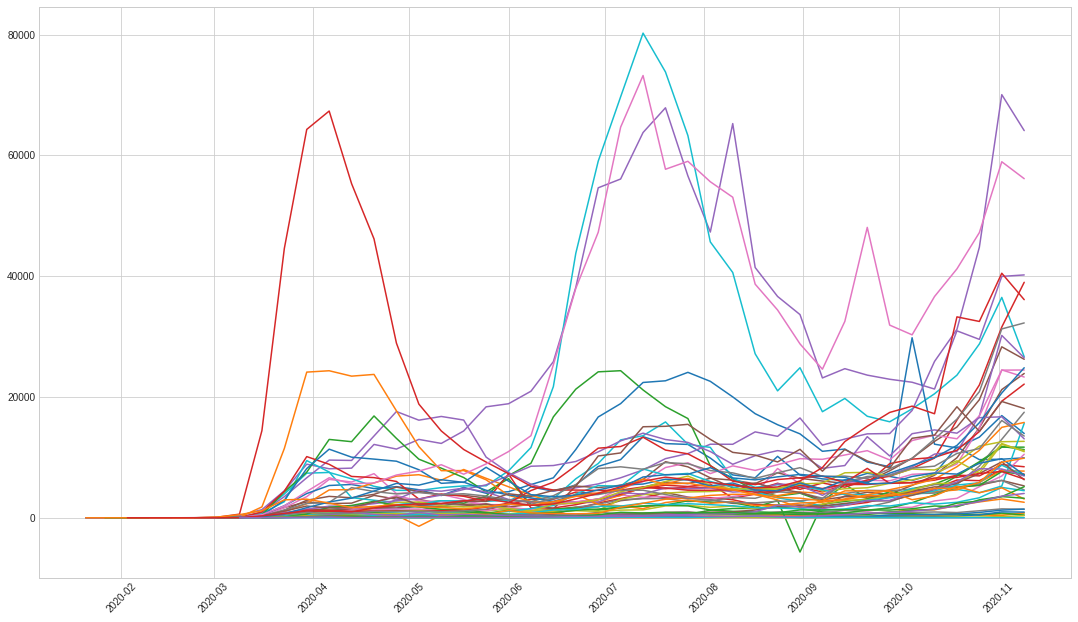

In [111]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes()
plt.xticks(rotation=45)
# ax.plot(covidData_temp.date, covidData_temp.daily_cases, marker='o', color='b')
## ax.plot(covidData_aggState.data_week, covidData_aggState.daily_cases)
for state in (covidData_aggState['State'].unique()):
  tmp_data = covidData_aggState[covidData_aggState['State'] == state]
  # print(tmp_data.head())
  # print(tmp_data.shape)
  plt.plot(tmp_data['Date'], tmp_data['Weekly Cases']) 
  # plot a horizontal line using each custom line style
    # NB plot.plt draws a line between the following points: ([x0,x1],[y0,y1])
    # plt.text(4.5,n,dashList[n]) # ...and show the numbers used to generate each custom linestyle
plt.show()

In [112]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_agg['Date'],
                  y=covidData_agg['Weekly Cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title="Number of Cases by Week",
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Cases'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



In [113]:
covidData.shape

(729025, 12)

In [114]:
# plt.figure(figsize=(10,5))
# ax = sns.boxplot(x="date", y="daily_cases", data=a)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [115]:
covidData_agg_daily.head()

,date,daily_cases
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
3,2020-01-24,0.0
4,2020-01-25,0.0


In [116]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_agg_daily['date'],
                  y=covidData_agg_daily['daily_cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title="Total Number of Cases by Day",
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Day'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



In [117]:
###############################
# Enter your state county
###############################

myState = 'Texas'
myCounty = 'Brazoria'



In [118]:
covidData_aggStateCounty['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [119]:
######################################################
# Go back to raw data with difference calculation
# Aggregate State total
######################################################

covidData.head()

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow,daily_cases,daily_deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21,4,1,1,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22,4,1,2,0.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23,4,1,3,0.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4,1,4,NaN,NaN
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24,4,1,4,0.0,0.0


In [120]:
# Create view of Daily count by State
# Recall 

# covidData_agg_daily = covidData.groupby(['date'], as_index=False)['daily_cases'].sum()

covidData_aggState_daily = covidData.groupby(['state', 'date'], as_index=False)['daily_cases'].sum()

In [121]:
 # covidTrace = 
 # go.Bar(x = covidData_aggState_daily.date, y = covidData_aggState_daily.daily_cases)

In [122]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_aggState_daily[covidData_aggState_daily['state'] == myState]['date'],
                  y=covidData_aggState_daily[covidData_aggState_daily['state'] == myState]['daily_cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title=("Number of Daily Cases for " + "State: " + myState),
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Day'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



In [123]:
# We have State data aggregated

In [124]:
covidData_aggState[covidData_aggState['State'] == myState]

,State,Week of Year,Weekly Cases,Date,_merge
1712,Texas,7,1.0,2020-02-10,both
1713,Texas,8,2.0,2020-02-17,both
1714,Texas,9,7.0,2020-02-24,both
1715,Texas,10,7.0,2020-03-02,both
1716,Texas,11,37.0,2020-03-09,both
1717,Texas,12,519.0,2020-03-16,both
1718,Texas,13,1969.0,2020-03-23,both
1719,Texas,14,4356.0,2020-03-30,both
1720,Texas,15,6631.0,2020-04-06,both
1721,Texas,16,5642.0,2020-04-13,both


In [125]:
##############################
# Same chart but by Week
##############################

# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_aggState[covidData_aggState['State'] == myState]['Date'],
                  y=covidData_aggState[covidData_aggState['State'] == myState]['Weekly Cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title=("Number of Weekly Cases for " + "State: " + myState),
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Day'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



In [126]:
##############################
# Look closer at county
##############################

In [127]:
pd.DataFrame(covidData_aggStateCounty[covidData_aggStateCounty['State'] == myState]['County'].unique())

,0
0,Anderson
1,Andrews
2,Angelina
3,Aransas
4,Archer
5,Armstrong
6,Atascosa
7,Austin
8,Bailey
9,Bandera


In [128]:
covidData_aggStateCounty.head(100)

,State,County,Week of Year,Weekly Cases,Date,_merge
0,Alabama,Autauga,13,5.0,2020-03-23,both
1,Alabama,Autauga,14,6.0,2020-03-30,both
2,Alabama,Autauga,15,7.0,2020-04-06,both
3,Alabama,Autauga,16,8.0,2020-04-13,both
4,Alabama,Autauga,17,10.0,2020-04-20,both
5,Alabama,Autauga,18,11.0,2020-04-27,both
6,Alabama,Autauga,19,26.0,2020-05-04,both
7,Alabama,Autauga,20,36.0,2020-05-11,both
8,Alabama,Autauga,21,49.0,2020-05-18,both
9,Alabama,Autauga,22,62.0,2020-05-25,both


In [129]:
covidData_aggStateCounty_daily[(covidData_aggStateCounty_daily['State'] == myState) & (covidData_aggStateCounty_daily['County'] == myCounty)]

,State,County,Date,Daily Cases
593176,Texas,Brazoria,2020-03-14,0.0
593177,Texas,Brazoria,2020-03-15,0.0
593178,Texas,Brazoria,2020-03-16,0.0
593179,Texas,Brazoria,2020-03-17,0.0
593180,Texas,Brazoria,2020-03-18,2.0
593181,Texas,Brazoria,2020-03-19,0.0
593182,Texas,Brazoria,2020-03-20,6.0
593183,Texas,Brazoria,2020-03-21,4.0
593184,Texas,Brazoria,2020-03-22,0.0
593185,Texas,Brazoria,2020-03-23,2.0


In [130]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_aggStateCounty[(covidData_aggStateCounty['State'] == myState) & (covidData_aggStateCounty['County'] == myCounty)]['Date'],
                  y=covidData_aggStateCounty[(covidData_aggStateCounty['State'] == myState) & (covidData_aggStateCounty['County'] == myCounty)]['Weekly Cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title=("Number of Weekly Cases for County: " + myCounty + " and State: " + myState),
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Day'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



In [131]:
# Pivot tables
covidData.head()

,date,county,state,fips,cases,deaths,date_dtFormat,date_week,date_month,date_dow,daily_cases,daily_deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0,2020-01-21,4,1,1,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,2020-01-22,4,1,2,0.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0,2020-01-23,4,1,3,0.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0,2020-01-24,4,1,4,NaN,NaN
4,2020-01-24,Snohomish,Washington,53061.0,1,0,2020-01-24,4,1,4,0.0,0.0


In [132]:
# covidTrace = go.Bar(x = covidData_temp.date, y = covidData_temp.daily_cases)

trace_cases = go.Bar(
                  # x=covidData_temp.date,
                  # y=covidData_temp.daily_cases,
                  # name='Cases',
                  # marker=dict(color='#ffcdd2')
                  x=covidData_aggStateCounty_daily[(covidData_aggStateCounty_daily['State'] == myState) & (covidData_aggStateCounty_daily['County'] == myCounty)]['Date'],
                  y=covidData_aggStateCounty_daily[(covidData_aggStateCounty_daily['State'] == myState) & (covidData_aggStateCounty_daily['County'] == myCounty)]['Daily Cases'],
                  name='Cases',
                  marker=dict(color='#ffcdd2')
                  )

data = [trace_cases]

layout = go.Layout(title=("Number of Daily Cases for County: " + myCounty + " and State: " + myState),
                xaxis=dict(title='Date'),
                yaxis=dict(title='Number of Day'))

fig = go.Figure(data=data, layout=layout)

# HTML(fig.to_html())
fig.show()
# fig = go.Figure([trace_cases])

# plotly.offline.plot(fig)



# layout = go.Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School')
# # fig = go.box(covidData['cases'], y='daily_cases')
# fig = go.Figure(covidData.cases)
# fig.show()



# Shortcut


In [133]:
covid_pivot = pd.pivot_table(covidData, values='daily_cases', index=['date_week'],
                    columns=['state','county'], aggfunc=np.sum, margins=True).round().tail()

In [134]:
covid_pivot.columns

MultiIndex([('Alabama',    'Autauga'),
            ('Alabama',    'Baldwin'),
            ('Alabama',    'Barbour'),
            ('Alabama',       'Bibb'),
            ('Alabama',     'Blount'),
            ('Alabama',    'Bullock'),
            ('Alabama',     'Butler'),
            ('Alabama',    'Calhoun'),
            ('Alabama',   'Chambers'),
            ('Alabama',   'Cherokee'),
            ...
            ('Wyoming',     'Platte'),
            ('Wyoming',   'Sheridan'),
            ('Wyoming',   'Sublette'),
            ('Wyoming', 'Sweetwater'),
            ('Wyoming',      'Teton'),
            ('Wyoming',      'Uinta'),
            ('Wyoming',    'Unknown'),
            ('Wyoming',   'Washakie'),
            ('Wyoming',     'Weston'),
            (    'All',           '')],
           names=['state', 'county'], length=3271)

In [135]:
pd.DataFrame(covid_pivot[(myState, myCounty)])

,Texas
,Brazoria
date_week,
43,289.0
44,258.0
45,403.0
46,281.0
All,13183.0


In [136]:
covidData_aggStateCounty[(covidData_aggStateCounty['State'] == myState) & (covidData_aggStateCounty['County'] == myCounty)].tail()
# covidD

,State,County,Week of Year,Weekly Cases,Date,_merge
86754,Texas,Brazoria,42,192.0,2020-10-12,both
86755,Texas,Brazoria,43,289.0,2020-10-19,both
86756,Texas,Brazoria,44,258.0,2020-10-26,both
86757,Texas,Brazoria,45,403.0,2020-11-02,both
86758,Texas,Brazoria,46,281.0,2020-11-09,both


In [137]:
# Look familiar?
# Take-away: Data has many forms (long-wide)

In [138]:
#####################
# Good Data Scientist takes a break
# Quiz time
#####################

In [139]:
#####################
# Create Model with metrics?
#####################

In [140]:
#####################
# Trend Diagnostics
#####################